# Lab 5.1 - Using Modules
Modules add to a programmer's toolkit and are an important part of most modern programming languages. In this lab we'll practice importing and using modules from the Python Standard Library, as well as some produced by 3rd parties.

## Programming Exercises

### The `math` Module
We will begin by importing a module that was introduced in the workbook. The `math` module has an extensive collection of mathematical functions which are detailed in the [documentation](https://docs.python.org/3/library/math.html). Although only one of the functions will be used in this task, it is recommended that you read through the documentation at a later stage so you're aware of what is offered.

#### Orbital Velocity Calculator
To maintain a stable orbit around a large body (like Earth), there is an equation which relates the orbit height and velocity. In this task you are to write a function which calculates the velocity required to orbit Earth at a given distance.

The formula for orbital velocity is given below, where $G$ is the gravitational constant, $M$ is the mass of the large body (Earth, in this case), and $r$ is the distance between the centre of the body and the satellite.

$v = \sqrt{\frac{GM}{r}}$

The constants have already been initialised for you, as well as another couple of interesting orbit distances.

In the next cell, define a function called `orbital_velocity` which takes the distance ($r$ in the equation) and returns the velocity required for stable orbit.

_Hint: You'll need to use a function from the math module._

In [2]:
G = 6.67430e-11
EARTH_MASS = 5.972e24
EARTH_RADIUS = 6378000
MOON_DISTANCE = 406000000

# Write your solution here
import math

def orbital_velocity(orbit_distance):
    return math.sqrt((G * EARTH_MASS) / orbit_distance)


print(orbital_velocity(EARTH_RADIUS))  # At earth's surface - 7.9km/s
print(orbital_velocity(8400000))       # Low earth orbit - 6.9km/s
print(orbital_velocity(42000000))      # Geostationary - 3.1km/s
print(orbital_velocity(MOON_DISTANCE)) # Moon's orbit - 1km/s

7905.339102657299
6888.47550346989
3080.6198974201525
990.8313621284602


###### Solution

The function is so short that it can be implemented in just two lines - and we have the math module to thank for it. Calculating square roots is a notoriously difficult and computationally expensive task, so it's ideal to use an implementation written by experts!

In [ ]:
import math

def orbital_velocity(orbit_distance):
    return math.sqrt((G * EARTH_MASS) / orbit_distance)

### Guessing Game
The following cell contains code for a guessing game where the computer picks a random number between 1 and 20, and it's the user's job to guess it. However, a core game mechanic is currently broken - the computer always picks the same number!

You are to fix the program, referring to the [Python Standard Library documentation](https://docs.python.org/3/library/index.html). There are no hints for this task, just read through the documentation and find an appropriate module, then find an appropriate function within that module and use it.

_Fine, one tiny hint: You can always use `<ctrl>+f` to search for text in a webpage._

In [4]:
import random

number_to_guess = random.randint(1, 20) # Replace with a randomly-generated integer

guess = -1
while guess != number_to_guess:
    guess = int(input('Guess a number: '))
    if guess < number_to_guess:
        print('Too low!')
    elif guess > number_to_guess:
        print('Too high!')
    
print('You got it!')

Guess a number: 1
Too low!
Guess a number: 20
Too high!
Guess a number: 10
Too low!
Guess a number: -1
Too low!
Guess a number: 5
Too low!
Guess a number: 8
Too low!
Guess a number: 9
Too low!
Guess a number: 14
Too low!
Guess a number: 18
Too high!
Guess a number: 17
Too high!
Guess a number: 15
Too low!
Guess a number: 16
You got it!


###### Solution

Much like in the previous exercise, the solution is very easy - if you can find the right module and function. Reading documentation is a skill that is developed over time, and saves a lot of headaches and time in the long run.

Note that the end values (1 and 20) are included in the randomly generated numbers, which is specified in the documentation where it states:
> Return a random integer N such that `a <= N <= b`

In [ ]:
import random

number_to_guess = random.randint(1, 20)

### Contact Organiser
In the below cell is a class which performs basic contact organisation. It maintains a list of names and phone numbers, which can be added to and printed to the screen. Your task is to implement the `load` and `save` functions, which read and write the contact details to file in JSON format.

When loading the file, you should check that the file exists before attempting to read it. The file contents should be read as JSON, and should replace the `contact_list` instance variable. You can save the file without checking for the file existance, as it's our intention to overwrite it anyway. 

To test your program, you'll need to run it a few times. Each time you run the program, the contacts should be carried over from the previous time.

_Hint: You should refer to the "Reading from a JSON File" and "Writing to a JSON File" sections of the workbook for examples._

In [5]:
class Contacts:
    def __init__(self, filename):
        self.filename = filename
        self.contact_list = []

    def print_contacts(self):
        print('Contacts:')
        for contact in self.contact_list:
            print(f'\t{contact["name"]}: {contact["phone"]}')
    
    def add_contact(self, name, phone):
        self.contact_list.append({'name': name, 'phone': phone})

    def load(self):
        # Load the contacts from file, if it exists
        pass

    def save(self):
        # Save the contacts to file
        pass


contacts = Contacts('contacts.json')
contacts.load()

adding_contacts = True
while adding_contacts:
    name = input('Name: ')
    phone = input('Phone number: ')
    contacts.add_contact(name, phone)
    adding_contacts = input('Add another? (y/n): ').lower() == 'y'

contacts.print_contacts()
contacts.save()

Name: Michael
Phone number: 0469369749
Add another? (y/n): n
Contacts:
	Michael: 0469369749


###### Solution

It's worth noting that the two imports were added at the top of the file even though they are only used in two functions. This is a good practice as it tells Python which modules are required before they are encountered during program execution.

If we try to run code which depends on modules that aren't installed, the program will fail immediately rather than only when those modules are encountered at some point during execution.

In [ ]:
import os
import json

class Contacts:
    def __init__(self, filename):
        self.filename = filename
        self.contact_list = []

    def print_contacts(self):
        print('Contacts:')
        for contact in self.contact_list:
            print(f'\t{contact["name"]}: {contact["phone"]}')
    
    def add_contact(self, name, phone):
        self.contact_list.append({'name': name, 'phone': phone})

    def load(self):
        # Load the contacts from file, if it exists
        if os.path.isfile(self.filename):
            file = open(self.filename, 'r')
            self.contact_list = json.load(file)
            file.close()

    def save(self):
        # Save the contacts to file
        file = open(self.filename, 'w')
        json.dump(self.contact_list, file)
        file.close()


contacts = Contacts('contacts.json')
contacts.load()

adding_contacts = True
while adding_contacts:
    name = input('Name: ')
    phone = input('Phone number: ')
    contacts.add_contact(name, phone)
    adding_contacts = input('Add another? (y/n): ').lower() == 'y'

contacts.print_contacts()
contacts.save()

### Installing 3rd Party Packages
The three packages we've used until now (`math`, `os`, `json`) are part of the Python Standard Library, and are included with your Python installation. We'll now install a couple of packages that are made by 3rd parties.

Run the below cell to install Pandas and Matplotlib using pip. This will also install any packages on which they depend, and will print a message to the screen notifying you of its progress.

Normally you would enter this command in your system console, but as we're working in notebooks, the exclamation mark (!) causes the line to be interpreted as a _shell_ command instead of Python code.

In [6]:
# Run this cell
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Basic Matplotlib
For this next task you are to plot a graph of orbital velocites at different distances from Earth. Code has already been written to calculate the orbital velocities for a range of distances (using the function you wrote earlier), so all that's left is to actually plot it using Matplotlib.

Referring to the examples in the "Plotting With Matplotlib" section of the workbook, plot a graph such that it looks like the below. It consists of:
 - The plotted data
 - A title
 - An x-axis label
 - A y-axis label


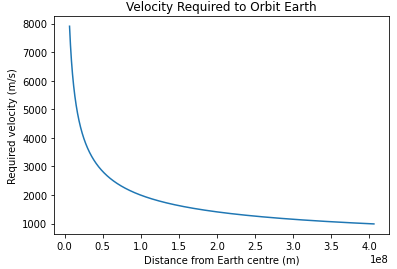

As `matplotlib.pyplot` is such a long name, you shold import it with an _alias_ like below. This will allow you to use `plt` instead of the whole module name.
```
import matplotlib.pyplot as plt
```

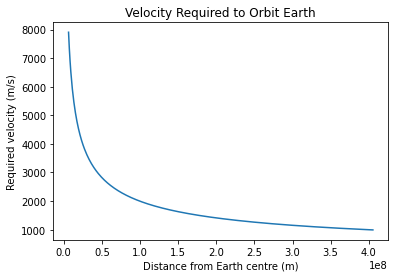

In [7]:
# A range of distances in 1000km increments.
distances = range(EARTH_RADIUS, MOON_DISTANCE, 1000000)

# Calculate the velocity for each distance
velocities = []
for distance in distances:
    velocities.append(orbital_velocity(distance))

# Write your plotting code here
# Hint: Make sure that you put the import statement first
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, velocities) 

ax.set_title('Velocity Required to Orbit Earth')
ax.set_xlabel('Distance from Earth centre (m)')
ax.set_ylabel('Required velocity (m/s)')
plt.show()


###### Solution

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(distances, velocities) 

ax.set_title('Velocity Required to Orbit Earth')
ax.set_xlabel('Distance from Earth centre (m)')
ax.set_ylabel('Required velocity (m/s)')
plt.show()

### Basic Pandas
Just like with Matplotlib, it's common to also give Pandas an alias when it's imported. Thus, for this exercise you should import pandas with an alias of `pd`.

#### Reading CSV Files
Along with the ability to read CSV files from the local computer, the Pandas function `read_csv` can also load CSV files from the internet. In the next cell, use this function to load the CSV into a Pandas Dataframe, then print the first few rows of the data by calling the method  `head` of the Dataframe.

You'll see some data relating to transactions at a restaurant, with information about the cost of the visit, the amount tipped, and more. You can view the dataset online [by clicking here](https://gist.github.com/anibali/28680d7e10f2833092f001308ce239c8).

In [8]:
URL = 'https://gist.githubusercontent.com/anibali/28680d7e10f2833092f001308ce239c8/raw/46e14202e109b9b0dcf671086cf54e6e59037d8c/tips.csv'

# Write your solution here
import pandas as pd

df = pd.read_csv(URL)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###### Solution

In [ ]:
import pandas as pd

df = pd.read_csv(URL)
df.head()

#### Calculating New Columns
Just as we can access a column using `df['some_column_name']`, the same can be done to add a new column. E.g.
```python
df['pay_amount'] = df['hourly_rate'] * df['hours_worked']
```
In the next cell, add a new column to the dataframe called `tip_percentage`, which is the tip amount as a percentage of the total bill.

_Hint: If you're not sure about the column names, you might like to refer to the previous task where we used `df.head`._

In [9]:
# Write your solution here
# Hint: Make sure that you put the import statement first
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Print the first few rows
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


###### Solution

In [ ]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Print the first few rows
df.head()

### `matplotlib` with `pandas`
Looking at raw values only has limited value, so we'll now combine Matplotlib and Pandas together to plot some nice graphs.

#### Bills and Tips
In the next cell, plot a _scatter_ plot of values relating the total bill amount and tip percentage. Don't worry about labelling the axes or giving it a title, as we only want a quick look at the data trend.

_Hint: The "Using Matplotlib with Pandas" section of the workbook might help if you're stuck._

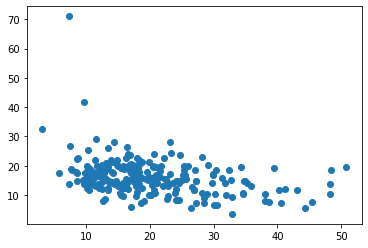

In [10]:
# Write your solution here
fig, ax = plt.subplots()

ax.scatter(df['total_bill'], df['tip_percentage'])
plt.show()


###### Solution

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['total_bill'], df['tip_percentage'])
plt.show()

According to this graph people seem to give a slightly larger tip when the bill is more expensive, although with such a small, noisy dataset we can't say anything for sure.

#### Bills and Tip per Person
It might be interesting to see how the amount that people tip differs depending on the numer of people in the group.

In the next cell, add a new column called `tip_per_person` which is the `tip` amount divided by the number of people in the group (`size`). Then, plot a graph with `size` on the x-axis and `tip_per_person` on the y-axis. What does this indicate?

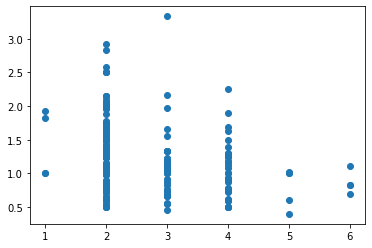

In [11]:
# Write your solution here
df['tip_per_person'] = df['tip'] / df['size']

fig, ax = plt.subplots()

ax.scatter(df['size'], df['tip_per_person'])
plt.show()


###### Solution

In [ ]:
df['tip_per_person'] = df['tip'] / df['size']

fig, ax = plt.subplots()

ax.scatter(df['size'], df['tip_per_person'])
plt.show()

It appears that people are more conservative with tipping when they're in a larger group. Interesting!

## Bonus Tasks
The bonus task for this lab goes a step further than the other exercises by plotting two data series on the same axes. This comes up very frequently in the real world, so make sure you give it a try!

### Plotting Multiple Data Series
You are to plot a scatter plot of the total bill and tip percentage, complete with a title, axis labels and a legend. Instead of plotting this for the entire dataframe, you should instead plot the rows for Thursday and Sunday using two different colours. Your final graph should look like the below example.

_Hint: You can look at the "Plotting Multiple Data Series" section of the workbook for reference._

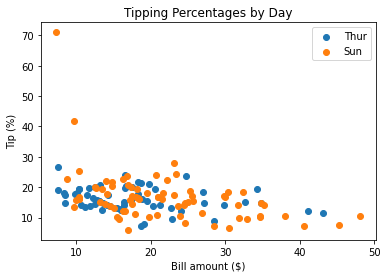

In [ ]:
# Write your solution here
